**SA463A &#x25aa; Data Wrangling and Visualization &#x25aa; Fall 2021 &#x25aa; Uhan**

# Lesson 19. Combining Data in Pandas

## Overview

- Data analysis rarely involves only a single data table or DataFrame


- Typically, we have many data tables, and we must combine them to answer the questions we're interested in


- In this lesson, we'll learn about two fundamental ways of combining data: *concatenation* and *merging*

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## A bunch of small example datasets 

* Let's start by importing Pandas:

In [1]:
import pandas as pd

- We'll use the following datasets throughout this lesson:

In [2]:
df1 = pd.read_csv('data/df1.csv')
df2 = pd.read_csv('data/df2.csv')
df3 = pd.read_csv('data/df3.csv')

left1 = pd.read_csv('data/left1.csv')
right1 = pd.read_csv('data/right1.csv')

left2 = pd.read_csv('data/left2.csv')
right2 = pd.read_csv('data/right2.csv')

left3 = pd.read_csv('data/left3.csv')
right3 = pd.read_csv('data/right3.csv')

left4 = pd.read_csv('data/left4.csv')
right4 = pd.read_csv('data/right4.csv')

left5 = pd.read_csv('data/left5.csv')
right5 = pd.read_csv('data/right5.csv')

- The cell below defines a function `display_side_by_side()` that allows us to display DataFrames side-by-side in a Jupyter notebook
    - This will let us visually examine what's going on throughout this lesson a bit more easily

In [3]:
from IPython.display import display_html

def display_side_by_side(*dfs):
    """
    Display DataFrames side-by-side
    """
    html_str = ''.join([df.to_html() for df in dfs])
    display_html(
        html_str.replace(
            'table', 
            'table style="display:inline;margin-right:20px"'
        ), 
        raw=True
    )

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Concatenation

- Suppose we have data in which the rows/observations are spread across multiple DataFrames


- We can combine these DataFrames using `pd.concat()`


- In its most basic form, `pd.concat()` takes a list of DataFrames as input, and returns a single DataFrame that combines the rows of the input DataFrames


- For example, let's take a look at DataFrames `df1` and `df2`:

In [4]:
display_side_by_side(df1, df2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


- We can combine the rows of `df1` and `df2` into a single DataFrame like this:

In [5]:
# Solution
pd.concat([df1, df2]).reset_index(drop=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


- Note that without `.reset_index()`, each row no longer has a unique index, which might be undesirable


- We can even concatenate DataFrames whose columns don't perfectly match


- For example, consider `df3`:

In [6]:
display_side_by_side(df1, df2, df3)

A 
 B 
 C 
 D 
 
 
 
 
 0 
 A0 
 B0 
 C0 
 D0 
 
 
 1 
 A1 
 B1 
 C1 
 D1 
 
 
 2 
 A2 
 B2 
 C2 
 D2 
 
 
 3 
 A3 
 B3 
 C3 
 D3 
 
 
 
 
 
 
 A 
 B 
 C 
 D 
 
 
 
 
 0 
 A4 
 B4 
 C4 
 D4 
 
 
 1 
 A5 
 B5 
 C5 
 D5 
 
 
 2 
 A6 
 B6 
 C6 
 D6 
 
 
 3 
 A7 
 B7 
 C7 
 D7 
 
 
 
 
 
 
 D 
 C 
 A 
 
 
 
 
 0 
 D8 
 C8 
 A8 
 
 
 1 
 D9 
 C9 
 A9 
 
 
 2 
 D10 
 C10 
 A10 
 
 
 3 
 D11 
 C11 
 A11

- Pandas will intelligently combine `df3` with `df1` and `df2` by default:

In [7]:
# Solution
pd.concat([df1, df2, df3]).reset_index(drop=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,NaN,C8,D8
9,A9,NaN,C9,D9


- `pd.concat()` can be used to combine DataFrames in many other ways


- [Here's the documentation for `pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Merging

### The basics

- Another way to combine two DataFrames is to match rows based on the values of a **key** column common to both DataFrames


- This is called **merging** or **joining**


- In Pandas, we can use the `.merge()` DataFrame method to accomplish these tasks:

    ```python
    left.merge(right, on=KEYS, how=MERGE_METHOD)
     
    ``` 
    
    - `left` and `right` are the DataFrames we want to merge
    
    - `KEYS` is a column name or a *list* of column names we want to use to match rows from `left` and `right`
    
    - `MERGE_METHOD` specifies the **merge method**: `'left'`, `'right'`, `'outer'`, or `'inner'`
        - We'll go over these soon
        - By default, `how='inner'`


- [Here is the documentation for `.merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)


- To illustrate, let's consider the DataFrames `left1` and `right1`:

In [8]:
display_side_by_side(left1, right1)

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
,key,C,D
0,K0,C0,D0
1,K2,C2,D2
2,K3,C3,D3
3,K5,C5,D5


- We can join the columns of `right1` with those of `left1`, matching rows by the value of `key`, like this:

In [9]:
# Solution
left1.merge(right1, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


- By default, the merge method is `'inner'`: the rows corresponding to the *intersection* of the keys from both DataFrames are included in the resulting DataFrame


- Summary of merge methods for the `how=...` keyword argument:

| Merge method | Description |
| :- | :- |
| `left` | Use keys from left DataFrame only |
| `right` | Use keys from right DataFrame only |
| `outer` | Use union of keys from both DataFrames |
| `inner` | Use intersection of keys from both DataFrames |


- If a key does not appear in either left or right table, the value in the merged table will be `NA`

❓ **Exercise 1.** Before running the code below, what does the resulting DataFrame look like?

In [10]:
left1.merge(right1, on='key', how='left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


❓ **Exercise 2.** Before running the code below, what does the resulting DataFrame look like?

In [11]:
left1.merge(right1, on='key', how='right')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K5,NaN,NaN,C5,D5


❓ **Exercise 3.** Before running the code below, what does the resulting DataFrame look like?

In [12]:
left1.merge(right1, on='key', how='outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K5,NaN,NaN,C5,D5


### Multiple keys

- As mentioned above, the `on=...` keyword argument of `.merge()` can take a *list* of column names


- For example, consider the DataFrames `left2` and `right2`:

In [13]:
display_side_by_side(left2, right2)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K2,K0,C2,D2


- We can merge `left2` and `right2` on the *combination* of `key1` and `key2` as follows:

In [14]:
# Solution
left2.merge(right2, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1


### One-to-one, one-to-many, many-to-many joins

- So far, we've only seen examples of **one-to-one joins**: the keys in both the left and right DataFrames are unique

- In a **one-to-many join**, the keys in one DataFrame are unique, while the keys in the other DataFrame are possibly duplicated


- For example, let's consider `left3` and `right3`:

In [15]:
display_side_by_side(left3, right3)

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K0,A2,B2
3,K1,A3,B3
,key,C,D
0,K0,C0,D0
1,K1,C1,D1


- If we merge `left3` and `right3` on `key`, we get:

In [16]:
# Solution
left3.merge(right3, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A2,B2,C0,D0
2,K1,A1,B1,C1,D1
3,K1,A3,B3,C1,D1


- Note that the rows in `right3` are now repeated in the merged DataFrame

- In a **many-to-many join**, the keys in both the left and right DataFrames are possibly duplicated


- For example, let's consider `left4` and `right4`:

In [17]:
display_side_by_side(left4, right4)

,key,A,B
0,K0,A0,B0
1,K0,A1,B1
2,K1,A2,B2
,key,C,D
0,K0,C0,D0
1,K0,C1,D1
2,K1,C2,D2


- If we merge `left4` and `right4` on `key`, we get:

In [18]:
# Solution
left4.merge(right4, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A0,B0,C1,D1
2,K0,A1,B1,C0,D0
3,K0,A1,B1,C1,D1
4,K1,A2,B2,C2,D2


- Take a close look at the rows with `key` equal to `K0`


- In the merged data set, we get *all* possible combinations of the rows from `left4` and `right4` with key equal to `K0`

### Common column names

- Sometimes we want to merge two DataFrames that have common column names (other than the key)


- For example, let's take a look at `left5` and `right5`, which both have a column named `A`:

In [19]:
display_side_by_side(left5, right5)

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
,key,A,C
0,K0,AA0,C0
1,K1,AA1,C1
2,K2,AA2,C2
3,K3,AA3,C3


- What happens when we merge `left5` and `right5` on `key`?

In [20]:
# Solution
left5.merge(right5, on='key')

,key,A_x,B,A_y,C
0,K0,A0,B0,AA0,C0
1,K1,A1,B1,AA1,C1
2,K2,A2,B2,AA2,C2
3,K3,A3,B3,AA3,C3


- Pandas handles the conflict in column names by appending `_x` to the left column names, and `_y` to the right column names


- You can customize this behavior with the `suffixes=(LEFT_SUFFIX, RIGHT_SUFFIX)` keyword argument in `.merge()`, like this:

In [21]:
# Solution
left5.merge(right5, on='key', suffixes=('left', 'right'))

,key,Aleft,B,Aright,C
0,K0,A0,B0,AA0,C0
1,K1,A1,B1,AA1,C1
2,K2,A2,B2,AA2,C2
3,K3,A3,B3,AA3,C3


- You can also use `.rename()` to clean up the column names afterwards in whatever way you wish

### Different keys for the left and right DataFrames

- We can also specify different column names as keys for the left and right DataFrames, with the `left_on=...` and `right_on=...` keyword arguments of `.merge()`


- For example, let's consider `left2` and `right2` again:

In [22]:
display_side_by_side(left2, right2)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K2,K0,C2,D2


- We can merge `left2` and `right2`, using `key1` as the key for `left2`, and `key2` as the key for `right2`, like this:

In [23]:
# Solution
left2.merge(right2, left_on='key1', right_on='key2')

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K2,K0,C2,D2
3,K0,K1,A1,B1,K0,K0,C0,D0
4,K0,K1,A1,B1,K1,K0,C1,D1
5,K0,K1,A1,B1,K2,K0,C2,D2


<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Problems

In the same folder as this notebook, there are 5 CSV files that together, give a comprehensive picture of the outbound flights from NYC airports in 2013:

| Suggested DataFrame name | File | Description |
| :- | :- | :- |
| `flights` | `data/nycflights13_flights.csv` | Information about each flight &mdash; this is the same dataset we've worked with in previous lessons |
| `airlines` | `data/nycflights13_airlines.csv` | Full carrier names and their corresponding abbreviated codes |
| `airports` | `data/nycflights13_airports.csv` | Information about each airport, identified by the `faa` airport code |
| `planes` | `data/nycflights13_planes.csv` | Information about each plane, identified by its `tailnum` |
| `weather` | `data/nycflights13_weather.csv` | Weather information at each NYC airport for each hour |


You'll use these datasets in the problems below. In addition, you'll also use Altair to create some visualizations based on these datasets, so import Altair and `vega_datasets` before you begin:

In [24]:
import altair as alt
from vega_datasets import data

To use Altair with large datasets (more than 5000 rows), enable the JSON data transformer and the JupyterLab renderer as well:

In [25]:
alt.data_transformers.enable('json', prefix='altair-data/')
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

If you haven't already, make sure to create a folder called `altair-data` in the same folder as this notebook.

### Problem 1

Read the 5 CSV files into DataFrames, using the suggested names above. Inspect them to get a sense of their contents. Note that:

- `flights` connects to `planes` through the variable `tailnum`
- `flights` connects to `airlines` through the variable `carrier`
- `flights` connects to `airports` in two ways: the variables `origin` and `dest`
- `flights` connects to `weather` through the variables `origin`, `year`, `month`, `day`, and `hour`

In [26]:
# Solution
flights = pd.read_csv('data/nycflights13_flights.csv')
airlines = pd.read_csv('data/nycflights13_airlines.csv')
airports = pd.read_csv('data/nycflights13_airports.csv')
planes = pd.read_csv('data/nycflights13_planes.csv')
weather = pd.read_csv('data/nycflights13_weather.csv')

In [27]:
# Solution
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [28]:
# Solution
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [29]:
# Solution
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [30]:
# Solution
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [31]:
# Solution
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


### Problem 2

Merge the DataFrame `flights` and `airlines` to create a new DataFrame with the same rows as `flights`, and includes the carrier's name (`name` in `airlines`) in each row.

In [32]:
# Solution
(
    flights
    .merge(airlines, on='carrier')   
)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,United Air Lines Inc.
2,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z,United Air Lines Inc.
3,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01T11:00:00Z,United Air Lines Inc.
4,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,UA,1124,N53441,EWR,SFO,361.0,2565,6,0,2013-01-01T11:00:00Z,United Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,19,1759.0,1805,-6.0,1946.0,1953,-7.0,OO,5568,N760SK,LGA,CLE,64.0,419,18,5,2013-09-19T22:00:00Z,SkyWest Airlines Inc.
336772,2013,9,20,1758.0,1805,-7.0,1929.0,1953,-24.0,OO,5568,N766SK,LGA,CLE,60.0,419,18,5,2013-09-20T22:00:00Z,SkyWest Airlines Inc.
336773,2013,9,22,1759.0,1805,-6.0,1945.0,1953,-8.0,OO,5568,N772SK,LGA,CLE,67.0,419,18,5,2013-09-22T22:00:00Z,SkyWest Airlines Inc.
336774,2013,9,23,1759.0,1805,-6.0,1935.0,1953,-18.0,OO,5568,N776SK,LGA,CLE,68.0,419,18,5,2013-09-23T22:00:00Z,SkyWest Airlines Inc.


### Problem 3

The column `precip` in `weather` contains the precipitation in inches, for each `origin` airport, `year`, `month`, `day`, and `hour`.

Create a new DataFrame as follows. In `flights`, create a new variable containing the scheduled departure hour for each flight. Merge the DataFrames `flights` and `weather` to create a new DataFrame with the same rows as `flights`, and includes the amount of precipitation at the origin airport and the scheduled departure hour for each flight. Filter the rows in your resulting DataFrame for flights in December 2013. Drop and rename columns as necessary. 

Use Altair with the resulting DataFrame to create a scatter plot showing the relationship between the precipitation and departure delay among flights departing NYC airports in December 2013. Do you see what you expected?

*Hint.* You may find [this list of NumPy mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html) useful when computing the scheduled departure hour of each flight. Also see Lesson 15.

In [33]:
# Solution
import numpy as np

flights_with_precip = (
    flights
    .query('year == 2013 and month == 12')
    .assign(
        sched_dep_hour=lambda x: np.floor(x['sched_dep_time'] / 100)
    )
    .merge(weather, on=['origin', 'year', 'month', 'day', 'hour'], how='left')
    [['precip', 'dep_delay']]
)

flights_with_precip.head()

,precip,dep_delay
0,0.0,14.0
1,0.0,18.0
2,0.0,-7.0
3,0.0,5.0
4,0.0,-4.0


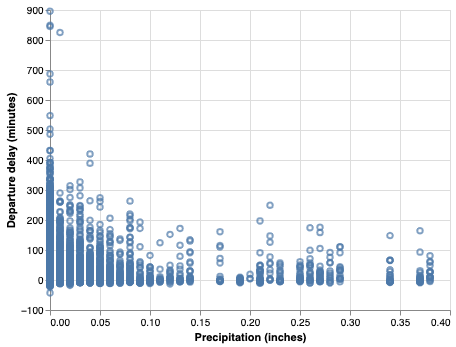

In [34]:
# Solution
alt.Chart(flights_with_precip).mark_point().encode(
    alt.X('precip:Q', title='Precipitation (inches)'),
    alt.Y('dep_delay:Q', title='Departure delay (minutes)')
)

### Problem 4

The column `year` in `planes` contains the year of manufacture for each plane.

Create a new DataFrame as follows. Merge the DataFrames `flights` and `planes` to create a new DataFrame with the same rows as `flights`, and includes the plane's year of manufacture in each row. Drop and rename columns as necessary. Then group the flights by the plane's year of manufacture and compute the average arrival delay for each group. You should end up with a DataFrame with 2 columns: the year of manufacture, and the corresponding average arrival delay.

Use Altair with the resulting DataFrame to create a line plot showing the relationship between the age of a plane and its delays among flights departing NYC airports in 2013. Do you see what you expected?

In [35]:
# Solution
delay_by_age = (
    flights
    .merge(planes, on='tailnum')
    .drop(columns=['type', 'manufacturer', 'model', 'engines', 'seats', 'speed', 'engine'])
    .rename(
        columns={
            'year_x': 'year',
            'year_y': 'manufacture_year'
        }
    )
    .groupby(['manufacture_year'])
    .agg(
        avg_arr_delay=('arr_delay', 'mean')
    )
    .reset_index()
)

delay_by_age.head()

,manufacture_year,avg_arr_delay
0,1956.0,3.500000
1,1959.0,4.089286
2,1963.0,1.420000
3,1965.0,-16.250000
4,1967.0,4.045455


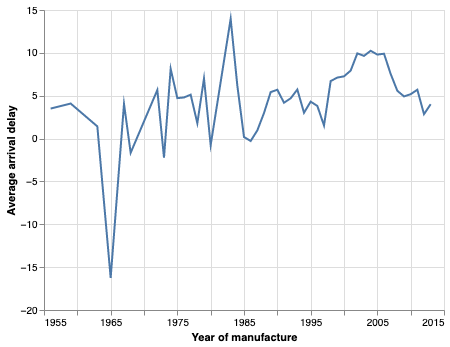

In [36]:
# Solution
alt.Chart(delay_by_age).mark_line().encode(
    alt.X('manufacture_year:Q', 
          title='Year of manufacture',
          # This overrides the default formatting for a
          # quantitative field and displays the axis labels
          # without commas
          axis=alt.Axis(format='d')),
    alt.Y('avg_arr_delay:Q', title='Average arrival delay')
)

### Problem 5

Using the DataFrame `flights`, compute the number of flights from NYC airports to each destination in 2013. Merge the resulting DataFrame with `airports` so that it includes the latitude and longitude coordinates for each destination.

Use Altair with the resulting DataFrame to produce a map of the United States, representing each destination with a circle whose size is proportional to the number of flights flown there from NYC airports in 2013.

In [37]:
# Solution
dest_count = (
    flights
    .groupby(['dest'])
    .agg(
        count=('flight', 'count')
    )
    .reset_index()    
    .merge(airports, left_on='dest', right_on='faa')
    .drop(columns=['faa', 'name', 'alt', 'tz', 'dst', 'tzone'])
)

dest_count.head()

,dest,count,lat,lon
0,ABQ,254,35.040222,-106.609194
1,ACK,265,41.253053,-70.060181
2,ALB,439,42.748267,-73.801692
3,ANC,8,61.174361,-149.996361
4,ATL,17215,33.636719,-84.428067


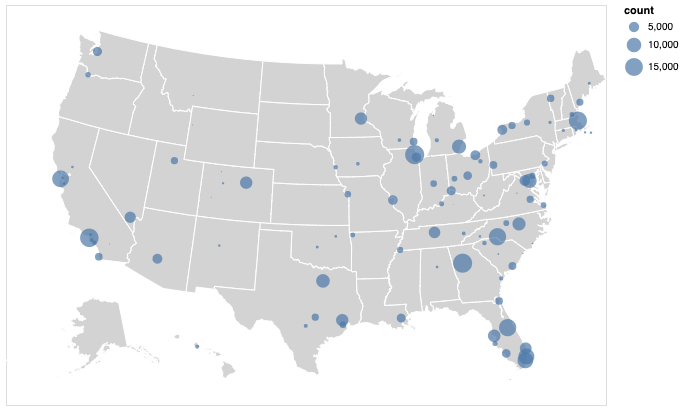

In [38]:
# Solution
base = alt.Chart(
    alt.topo_feature(data.us_10m.url, 'states')
).mark_geoshape(
    fill='lightgray', stroke='white', strokeWidth=1
).project(
    type='albersUsa'
)

points = alt.Chart(dest_count).mark_circle().encode(
    alt.Latitude('lat:Q'),
    alt.Longitude('lon:Q'),
    alt.Size('count:Q'),
    alt.Tooltip('dest:N'),
    alt.Order('count:Q', sort='descending')
)

(base + points).properties(
    width=600,
    height=400
)

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Notes and sources

- From the [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html):
    - [Merge, join, concatenate, and compare](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)


- Lesson and problems inspired by Chapter 13 of [R for Data Science](https://r4ds.had.co.nz/)    